In [1]:
%matplotlib inline
#Standard imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group

#own modules
from sigmoid import g,dg,ddg,dddg, plot_sigmoid
import myplots
from tensor_util import *
from main_function import f, df, ddf, dddf




In [2]:
def uniformSphere(d, m_x):
    x = np.random.normal(size=(m_x,d))
    for i in range(m_x):
        x[i] = x[i] / np.linalg.norm(x[i])
    return x

def perm_matrix(m):
    P = np.identity(m)
    P = np.random.permutation(P)#permutes only the rows
    return P, np.linalg.inv(P)
def decomp_svd_dd(X,A,B, randomize=False):
    """tbd.

    Parameters
    ----------
    X : matrix
        m_x samples \in R^m
    A : matrix
        m orthonormal vectors \in R^m
    B : matrix
        m_1 orthonormal vectors \in R^m
    randomize: bool
        if true performs a random unfolding
    Returns
    -------
    alot
        True if successful, False otherwise.
    """
    m = A.shape[1]
    ddf_values = ddf(X,A,B)
    unfolds = [np.reshape(dd, (m**2,)) for dd in ddf_values]
    
    if randomize:
        P,Q = perm_matrix(m**2)
        unfolds = [np.dot(P,v) for v in unfolds]
        
    M = np.transpose(np.array(unfolds))
    U,D,V = np.linalg.svd(M)
    if randomize: 
        U = np.dot(Q,U)
    return ddf_values, U, D
        
    
def decomp_svd_ddd(X,A,B, randomize=False):
    """tbd.

    Parameters
    ----------
    X : matrix
        m_x samples \in R^m
    A : matrix
        m orthonormal vectors \in R^m
    B : matrix
        m_1 orthonormal vectors \in R^m
    randomize: bool
        if true performs a random unfolding
    Returns
    -------
    alot
        True if successful, False otherwise.
    """
    m = A.shape[1]
    dddf_values = dddf(X,A,B)
    unfolds = [np.reshape(dd, (m**3,)) for dd in dddf_values]
    
    if randomize:
        P,Q = perm_matrix(m**3)
        unfolds = [np.dot(P,v) for v in unfolds]
        
    M = np.transpose(np.array(unfolds))
    U,D,V = np.linalg.svd(M)
    if randomize: 
        U = np.dot(Q,U)
    return dddf_values, U, D

In [3]:
#Setting parameters, and creating data
m = 3
m_1 = 1
m_x = 1000
X = uniformSphere(m, m_x)
A = ortho_group.rvs(dim = m)# m orthogonal vectors with dim m, a_1, ..., a_m
A = np.transpose(A)
B = ortho_group.rvs(dim = m)[:m_1]#m_1 orthogonal vectors with dimension m b_1, ..., b_m_1
B = np.transpose(B)

dist(U[:, :4], a_0*a_0) = [1.4141344319874121, 0.0312931403545227, 1.402404324070768, 1.395350513552968]
dist(U[:, :4], a_1*a_1) = [1.4133970752550264, 1.4018031323362905, 0.036435113478703984, 1.3914551480552604]
dist(U[:, :4], a_2*a_2) = [0.029033428321985872, 1.4137745720737589, 1.4127347773753696, 1.3935941810358334]
(sv_1+ ...+ sv_4)/(sum_i sv_i)=0.9966721222373545


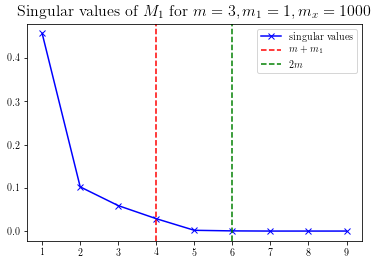

In [19]:
ddf_values, U_dd, D_dd = decomp_svd_dd(X,A,B,randomize=True)
myplots.plot_singular_values(D_dd, m, m_1, m_x)
k = m+m_1
for i in range(m):
    print("dist(U[:, :{}], a_{}*a_{}) = {}".format(k,i,i,tensor_distance_to_columns(A[:,i], U_dd, k, mode=2)))

ratio_sv = np.sum(D_dd[:k])/np.sum(D_dd)
print("(sv_1+ ...+ sv_{})/(sum_i sv_i)={}".format(k, ratio_sv))

dist(U[:, :4], a_0*a_0*a_0) = 0.39383590639631494
dist(U[:, :4], a_1*a_1*a_1) = 0.34519848132990355
dist(U[:, :4], a_2*a_2*a_2) = 0.22116468908868414
(sv_1+ ...+ sv_4)/(sum_i sv_i)=0.9833534896819552


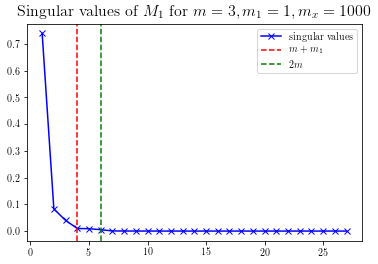

In [21]:
dddf_values, U_ddd, D_ddd = decomp_svd_ddd(X,A,B, randomize=False)
myplots.plot_singular_values(D_ddd, m,m_1,m_x)
k = m+m_1
for i in range(m):
    print("dist(U[:, :{}], a_{}*a_{}*a_{}) = {}".format(k,i,i,i,np.min(tensor_distance_to_columns(A[:,i], U_ddd, k, mode=3))))

ratio_sv = np.sum(D_ddd[:k])/np.sum(D_ddd)
print("(sv_1+ ...+ sv_{})/(sum_i sv_i)={}".format(k, ratio_sv))

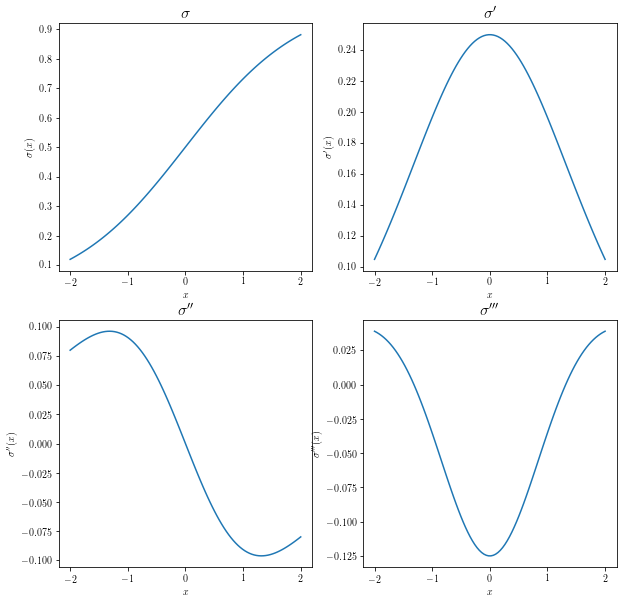

In [6]:
plot_sigmoid()